# Run Predictions

In [1]:
# Standard Imports
import numpy as np

# Importing all relevant packages for modeling in keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

# Import packages for showing the performance metrics
from sklearn.metrics import confusion_matrix

# Importing local functions
from src import eval_plots

from glob import glob
import cv2
import os
from PIL import Image

# Setting the random seed for reproducability
np.random.seed(123)

In [97]:
model = load_model('./models/DenseNet201/denseNet201.h5')

In [125]:
# set up batch generator for validation set with 1000 as the batch size
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        './test/13916/', 
        target_size=(100, 100), 
        batch_size = 32,shuffle=False)

Found 1633 images belonging to 2 classes.


In [126]:
predictions = model.predict(val_generator)

In [127]:
predictions

array([[0.0042536 ],
       [0.00074503],
       [0.02231789],
       ...,
       [0.01230311],
       [0.10537067],
       [0.32723868]], dtype=float32)

In [128]:
y_test = val_generator.labels

In [129]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [130]:
data = glob('./test/13916/**/*.png', recursive=True)


In [148]:
data = glob('./test/13916/**/*.png', recursive=True)

# Separating file name from the path of the file
files = []
for datum in data:
        files.append(os.path.basename(datum))

# removing the .png from the file names and isolating the x, y positions of the images
x = []
y = []
for file in files:
    # isolating the x and y coordinates of the image and converting to int type
    x.append(int(file.split('_')[2].replace('x','')))
    y.append(int(file.split('_')[3].replace('y','')))


# Initialize the full image space
full_slide = Image.new('RGB',(max(x)-min(x),max(y)-min(y)),color='#f2f2f5')

for datum in data:
    # Isolate the file name
    file = os.path.basename(datum)

    # grab the location of the image from the file
    x = int(file.split('_')[2].replace('x',''))
    y = int(file.split('_')[3].replace('y',''))
    case = file.split('_')[-1].replace('.png','')

    # Load the image in using the cv library
    img = Image.open(datum)

    # paste the image into the image space
    full_slide.paste(img,(x-51,y-51))

#     # paste the image into the image space
#     if case == 'class0':
#         full_slide.paste(img_neg,(x-51,y-51))
#     else:
#         full_slide.paste(img_pos,(x-51,y-51))


In [149]:
full_slide.save('13916_whole_slide_image.png')

In [133]:
img_pos = Image.new('RGB',(50,50),color='#dd5866')
img_pos.putalpha(150)

img_neg = Image.new('RGB',(50,50),color="#77c128")
img_neg.putalpha(150)

In [136]:
data = glob('./test/13916/**/*.png', recursive=True)

# Separating file name from the path of the file
files = []
for datum in data:
        files.append(os.path.basename(datum))

# removing the .png from the file names and isolating the x, y positions of the images
x = []
y = []
for file in files:
    # isolating the x and y coordinates of the image and converting to int type
    x.append(int(file.split('_')[2].replace('x','')))
    y.append(int(file.split('_')[3].replace('y','')))


# Initialize the full image space
full_slide = Image.new('RGB',(max(x)-min(x),max(y)-min(y)),color='#f2f2f5')

for datum in data:
    # Isolate the file name
    file = os.path.basename(datum)

    # grab the location of the image from the file
    x = int(file.split('_')[2].replace('x',''))
    y = int(file.split('_')[3].replace('y',''))
    case = file.split('_')[-1].replace('.png','')

    # Load the image in using the cv library
    img = Image.open(datum)

    # paste the image into the image space
#     full_slide.paste(img,(x-51,y-51))

#     # paste the image into the image space
    if case == 'class0':
        full_slide.paste(img_neg,(x-51,y-51))
    else:
        full_slide.paste(img_pos,(x-51,y-51))

In [147]:
full_slide.save('13916_whole_slide_image.png')

In [150]:
data = glob('./test/13916/**/*.png', recursive=True)

# Separating file name from the path of the file
files = []
for datum in data:
        files.append(os.path.basename(datum))

# removing the .png from the file names and isolating the x, y positions of the images
x = []
y = []
for file in files:
    # isolating the x and y coordinates of the image and converting to int type
    x.append(int(file.split('_')[2].replace('x','')))
    y.append(int(file.split('_')[3].replace('y','')))


# Initialize the full image space
full_slide = Image.new('RGB',(max(x)-min(x),max(y)-min(y)),color='#f2f2f5')
count = 0
for datum in data:
    # Isolate the file name
    file = os.path.basename(datum)

    # grab the location of the image from the file
    x = int(file.split('_')[2].replace('x',''))
    y = int(file.split('_')[3].replace('y',''))
    case = file.split('_')[-1].replace('.png','')

    # Load the image in using the cv library
    img = Image.open(datum)

    # paste the image into the image space
#     full_slide.paste(img,(x-51,y-51))

#     # paste the image into the image space
    if predictions[count] < 0.15:
        full_slide.paste(img_neg,(x-51,y-51))
    else:
        full_slide.paste(img_pos,(x-51,y-51))
    count+=1

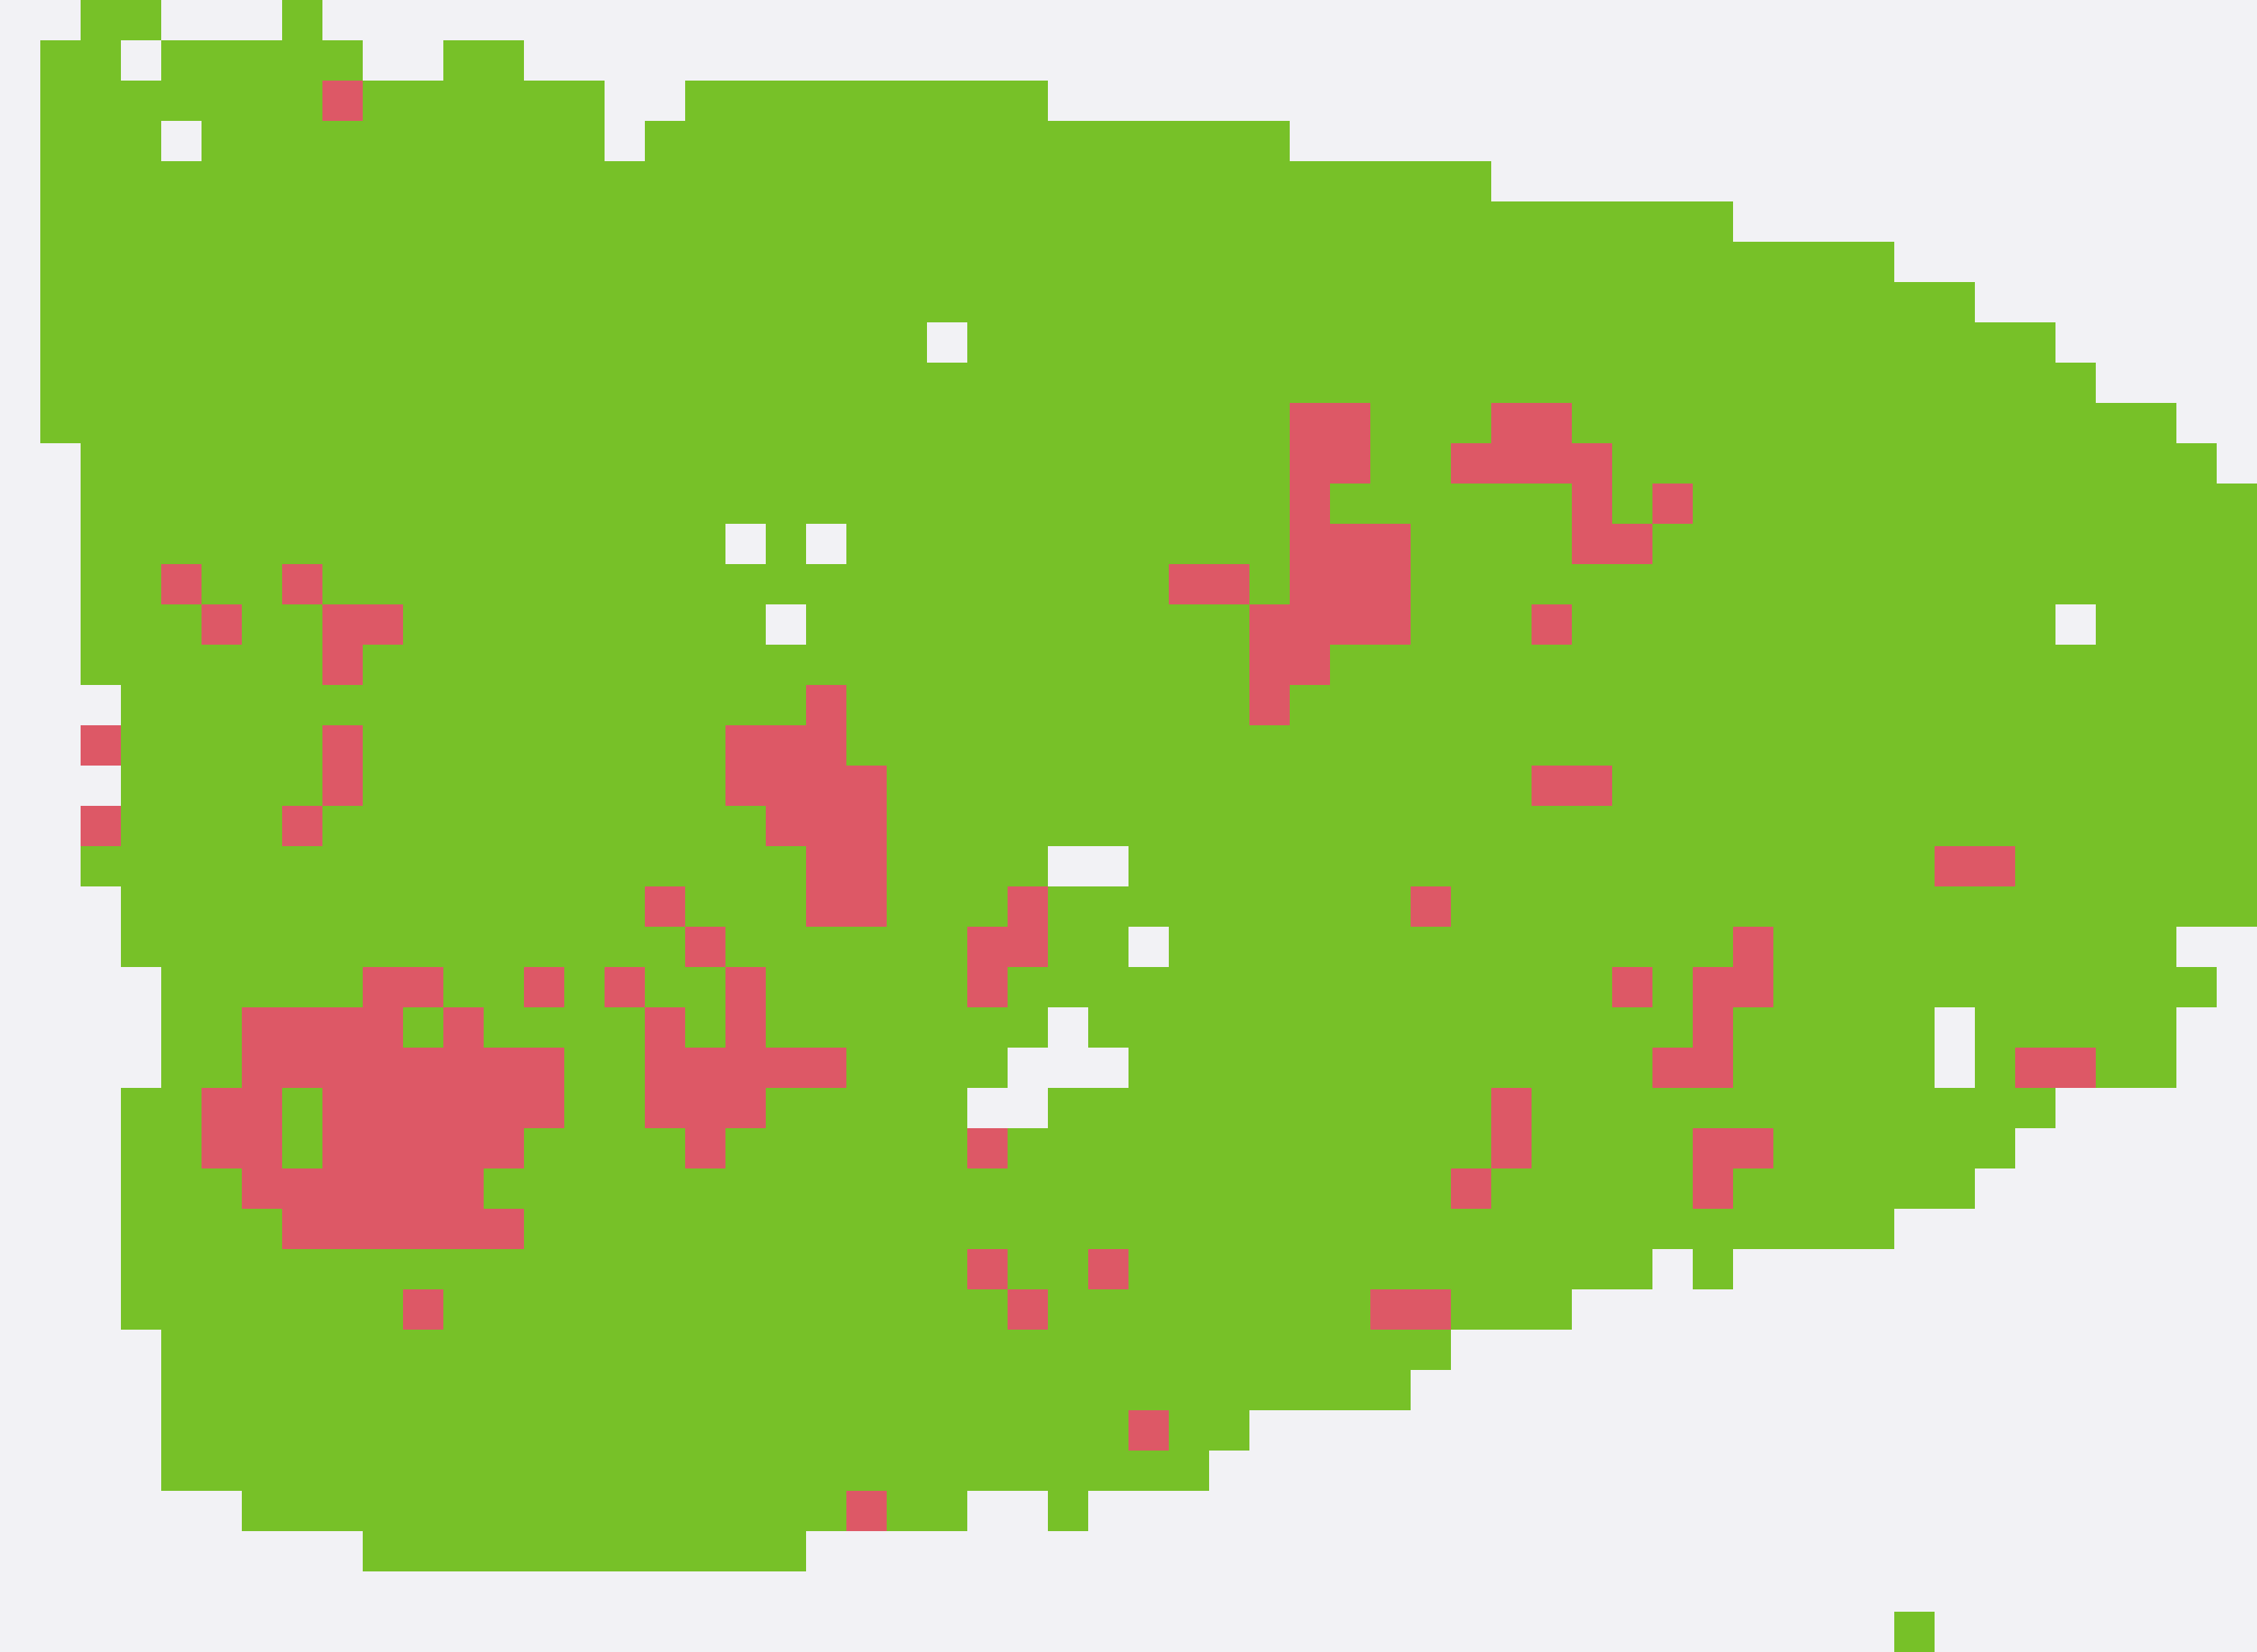

In [151]:
full_slide

In [152]:
normalized_predictions = (predictions - min(predictions))/(max(predictions) - min(predictions))

In [153]:
max(normalized_predictions)

array([1.], dtype=float32)

In [154]:
# Separating file name from the path of the file
files = []
for datum in data:
        files.append(os.path.basename(datum))

# removing the .png from the file names and isolating the x, y positions of the images
x = []
y = []
for file in files:
    # isolating the x and y coordinates of the image and converting to int type
    x.append(int(file.split('_')[2].replace('x','')))
    y.append(int(file.split('_')[3].replace('y','')))


# Initialize the full image space
full_slide = Image.new('RGB',(max(x)-min(x),max(y)-min(y)),color='#f2f2f5')
count = 0
for datum in data:
    # Isolate the file name
    file = os.path.basename(datum)

    # grab the location of the image from the file
    x = int(file.split('_')[2].replace('x',''))
    y = int(file.split('_')[3].replace('y',''))
    case = file.split('_')[-1].replace('.png','')

    # Load the image in using the cv library
    img = Image.new('RGB',(50,50),color=(int(255*normalized_predictions[count]),int(255*normalized_predictions[count]),int(255*normalized_predictions[count])))

    # paste the image into the image space
#     full_slide.paste(img,(x-51,y-51))
#     # paste the image into the image space
    full_slide.paste(img,(x-51,y-51))
    count+=1

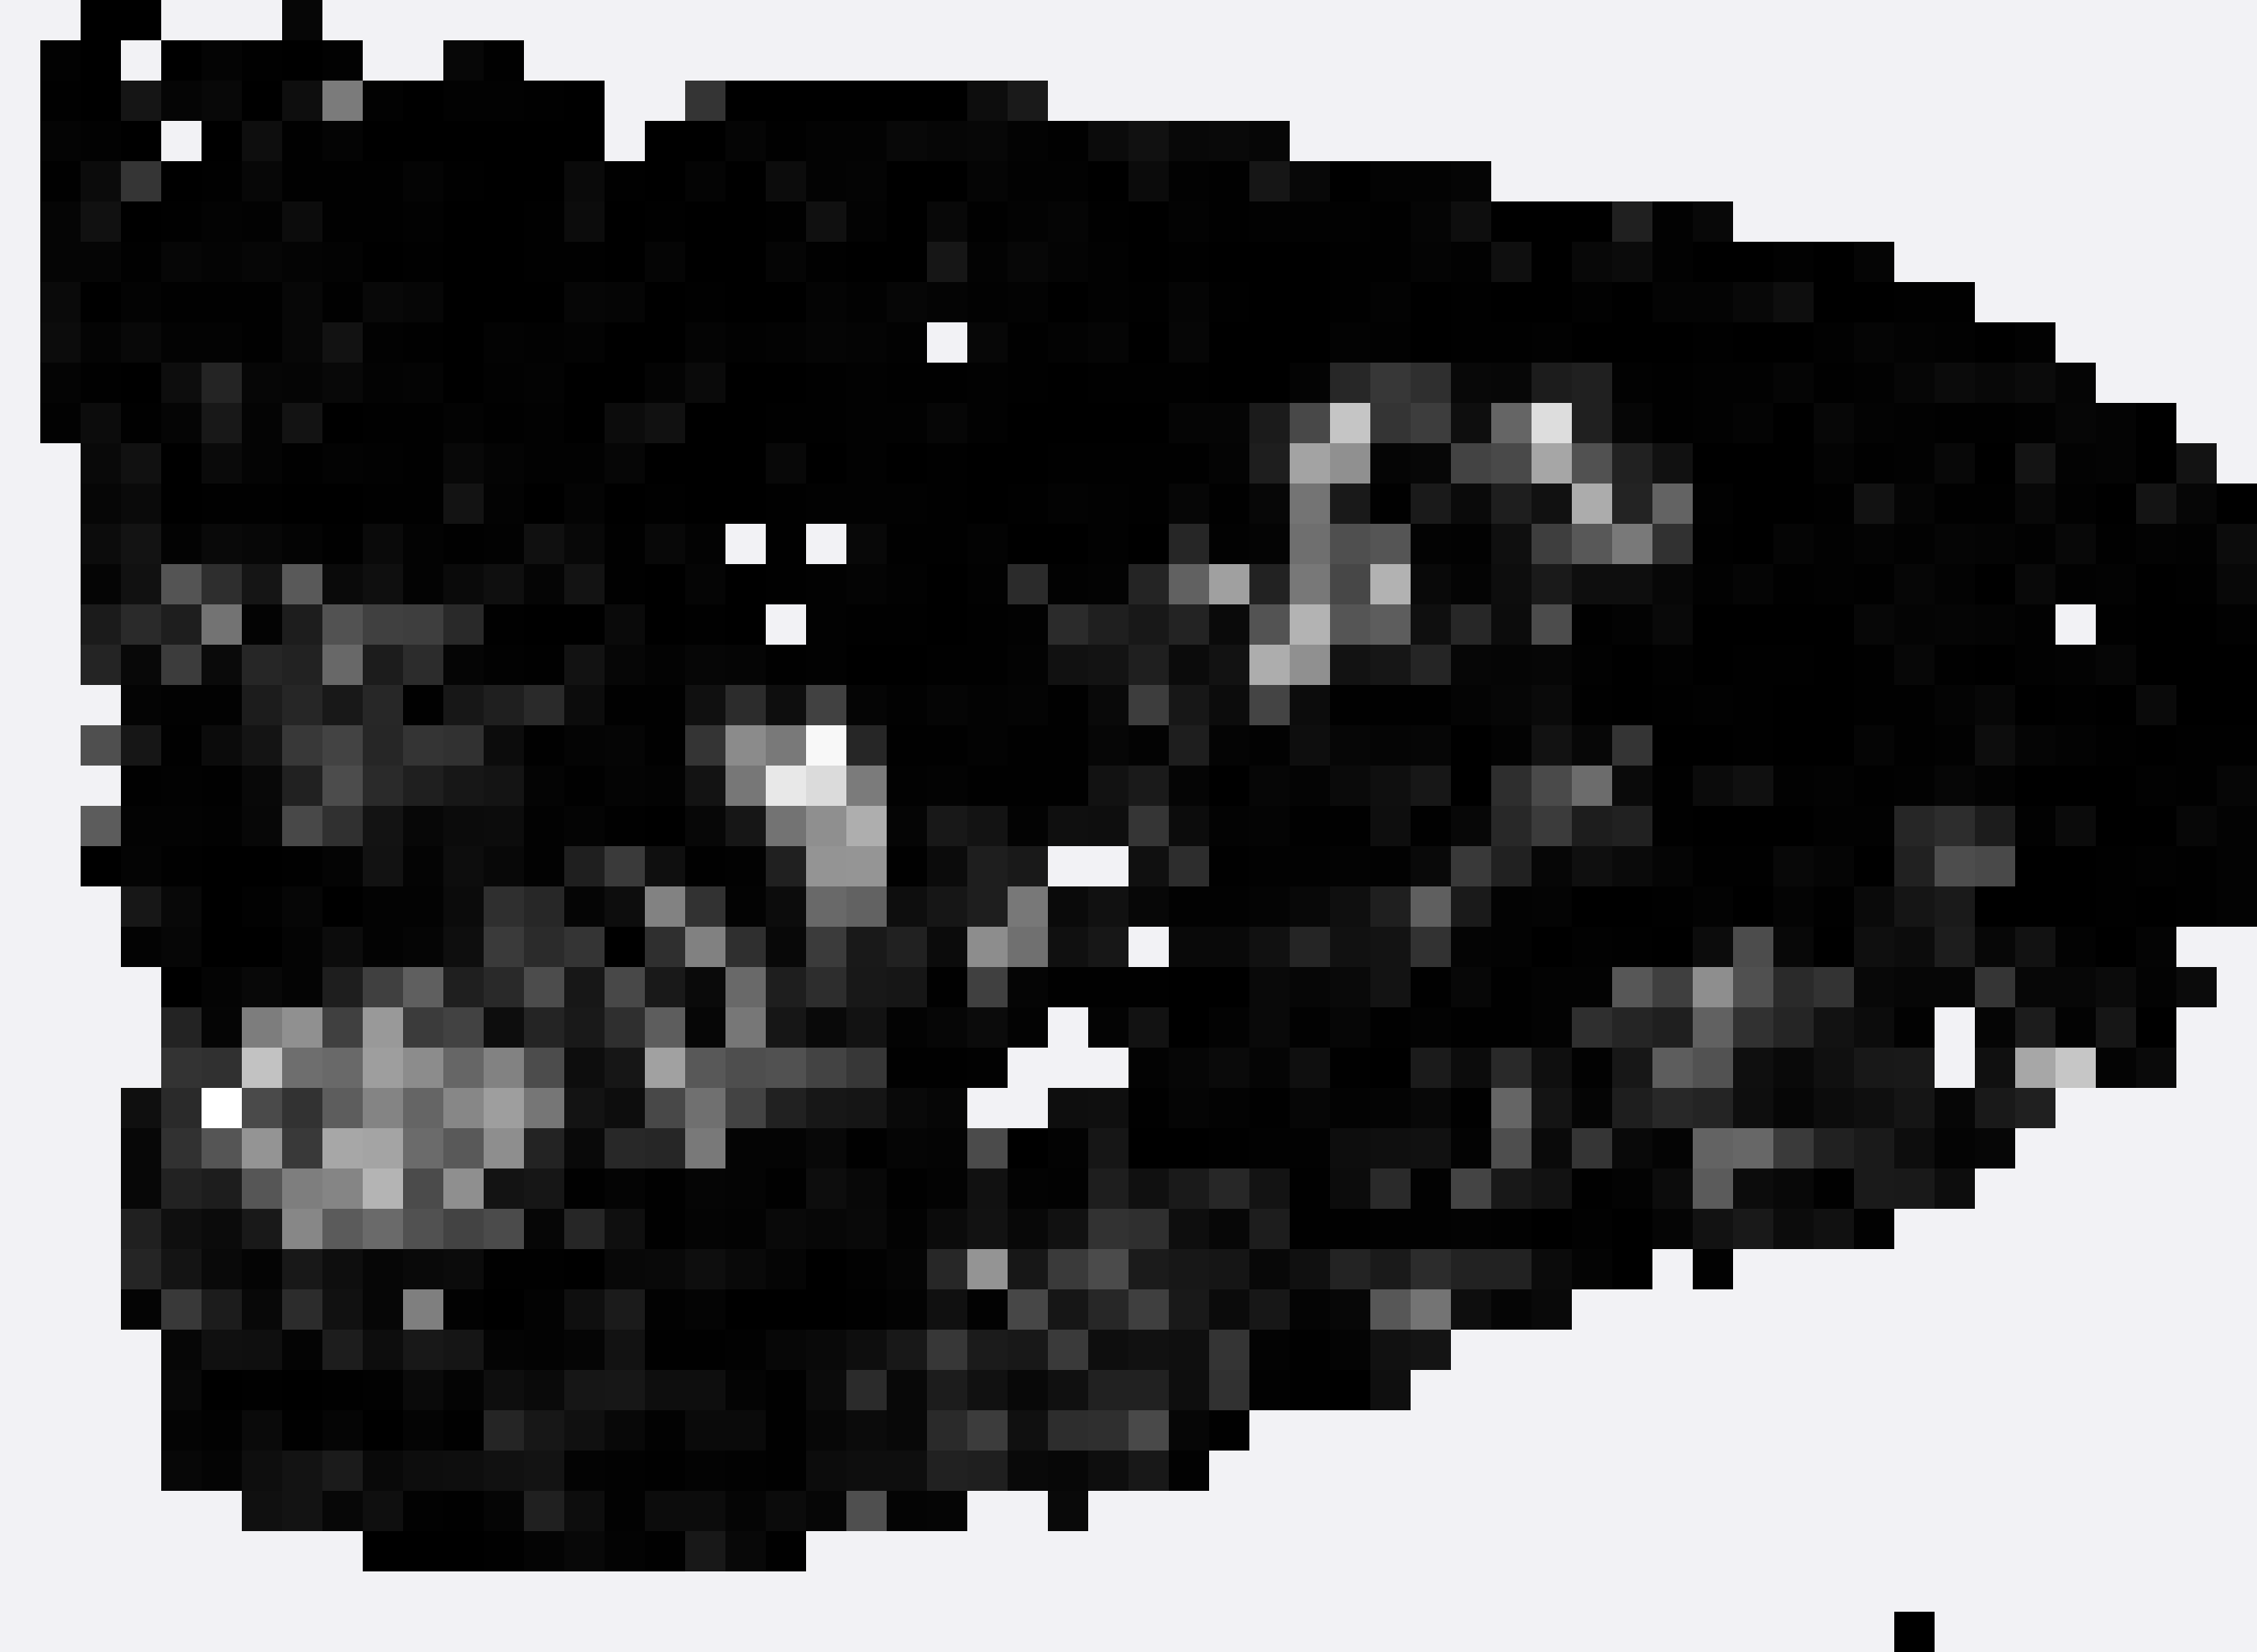

In [155]:
full_slide

In [156]:
full_slide.save('13916_heat_map.png')

In [158]:
# Function to change the image size
def changeImageSize(maxWidth, 
                    maxHeight, 
                    image):
    
    widthRatio  = maxWidth/image.size[0]
    heightRatio = maxHeight/image.size[1]

    newWidth    = int(widthRatio*image.size[0])
    newHeight   = int(heightRatio*image.size[1])

    newImage    = image.resize((newWidth, newHeight))
    return newImage
    
# Take two images for blending them together   
image1 = Image.open("./13916_whole_slide_image.png")
image2 = Image.open("./13916_heat_map.png")

# Make the images of uniform size
image3 = changeImageSize(800, 500, image1)
image4 = changeImageSize(800, 500, image2)

# Make sure images got an alpha channel
image5 = image3.convert("RGBA")
image6 = image4.convert("RGBA")

# Display the images
image5.show()
image6.show()

# alpha-blend the images with varying values of alpha
alphaBlended1 = Image.blend(image5, image6, alpha=.2)
alphaBlended2 = Image.blend(image5, image6, alpha=.6)

# Display the alpha-blended images
alphaBlended1.show()
alphaBlended2.show()